In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
from model_1 import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='whitegrid', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [4]:
sid = 0
bid = 14
trials = 80
env = Environment(sid=sid)
net = build_network(env)
sim = nengo.Simulator(net, dt=net.env.dt, progress_bar=False)    
with sim:
    sim.run(net.env.t_load)
    for trial in net.env.empirical.query("sid==@sid & bid==@bid")['trial'].unique()[:trials]:
        print(f"running sid {net.env.sid}, block {bid}, trial {trial}")
        net.env.set_cue(bid, trial)
        sim.run(net.env.t_cue)
        env.set_action(sim, net)
        env.set_reward(bid, trial)
        sim.run(net.env.t_reward)

running sid 0, block 14, trial 1
running sid 0, block 14, trial 2
running sid 0, block 14, trial 3
running sid 0, block 14, trial 4
running sid 0, block 14, trial 5
running sid 0, block 14, trial 6
running sid 0, block 14, trial 7
running sid 0, block 14, trial 8
running sid 0, block 14, trial 9
running sid 0, block 14, trial 10
running sid 0, block 14, trial 11
running sid 0, block 14, trial 12
running sid 0, block 14, trial 13
running sid 0, block 14, trial 14
running sid 0, block 14, trial 15
running sid 0, block 14, trial 16
running sid 0, block 14, trial 17
running sid 0, block 14, trial 18
running sid 0, block 14, trial 19
running sid 0, block 14, trial 20
running sid 0, block 14, trial 21
running sid 0, block 14, trial 22
running sid 0, block 14, trial 23
running sid 0, block 14, trial 24
running sid 0, block 14, trial 25
running sid 0, block 14, trial 26
running sid 0, block 14, trial 27
running sid 0, block 14, trial 28
running sid 0, block 14, trial 29
running sid 0, block 14

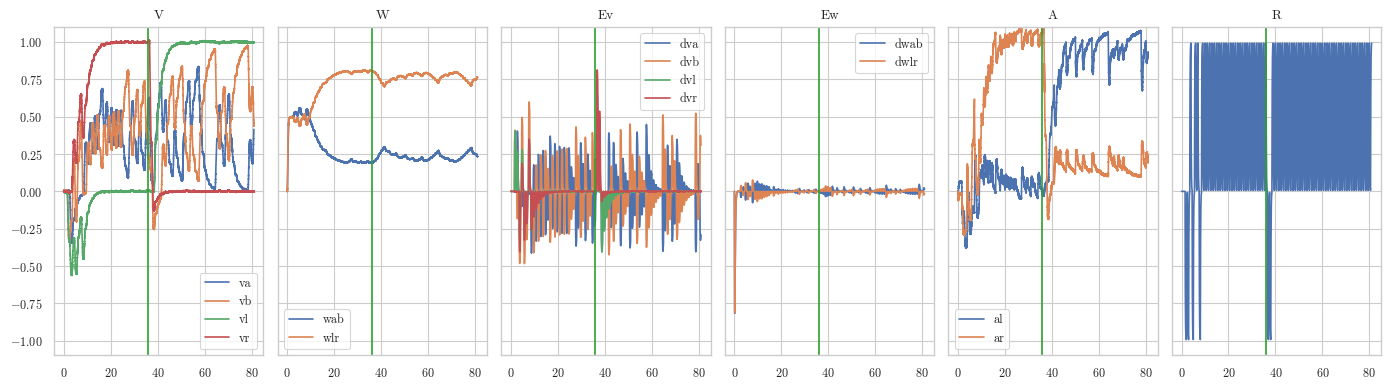

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharey=True, sharex=True, figsize=(14, 4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='va')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='vb')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='vl')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='vr')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,0], label='vletl')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,1], label='vletr')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,2], label='let')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,3], label='1-let')
# axes[0].plot(sim.trange(), sim.data[net.p_vletout][:,0], label='vletoutl', alpha=0.5)
# axes[0].plot(sim.trange(), sim.data[net.p_vletout][:,1], label='vletoutr', alpha=0.5)
axes[1].plot(sim.trange(), sim.data[net.p_w][:,0], label='wab')
axes[1].plot(sim.trange(), sim.data[net.p_w][:,1], label='wlr')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,0], label='dva')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,1], label='dvb')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,2], label='dvl')
axes[2].plot(sim.trange(), sim.data[net.p_ev][:,3], label='dvr')
axes[3].plot(sim.trange(), sim.data[net.p_ew][:,0], label='dwab')
axes[3].plot(sim.trange(), sim.data[net.p_ew][:,1], label='dwlr')
axes[4].plot(sim.trange(), sim.data[net.p_a][:,0], label='al')
axes[4].plot(sim.trange(), sim.data[net.p_a][:,1], label='ar')
axes[5].plot(sim.trange(), sim.data[net.p_reward][:,0])
axes[0].set(title='V', ylim=(-1.1,1.1))
axes[1].set(title='W')
axes[2].set(title='Ev')
axes[3].set(title='Ew')
axes[4].set(title='A')
axes[5].set(title='R')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
if trials>40:
    reversal_at_trial = env.empirical.query("sid==@sid & bid==@bid")['reversal_at_trial'].unique()[0]
    axes[0].axvline(reversal_at_trial, color=palette[2])
    axes[1].axvline(reversal_at_trial, color=palette[2])
    axes[2].axvline(reversal_at_trial, color=palette[2])
    axes[3].axvline(reversal_at_trial, color=palette[2])
    axes[4].axvline(reversal_at_trial, color=palette[2])
    axes[5].axvline(reversal_at_trial, color=palette[2])
plt.tight_layout()

# Compare

In [10]:
empirical = pd.read_pickle("data/empirical.pkl")
dfs = []
for sid in empirical['sid'].unique():
    data = pd.read_pickle(f"data/model1_reward07/model1_sid{sid}_behavior.pkl")
    dfs.append(data)
simulated = pd.concat(dfs, ignore_index=True)
simulated.to_pickle("data/model1_accuracy.pkl")

In [11]:
monkey_accuracy = pd.read_pickle("data/monkey_accuracy.pkl")
model_accuracy = pd.read_pickle("data/model1_accuracy.pkl")

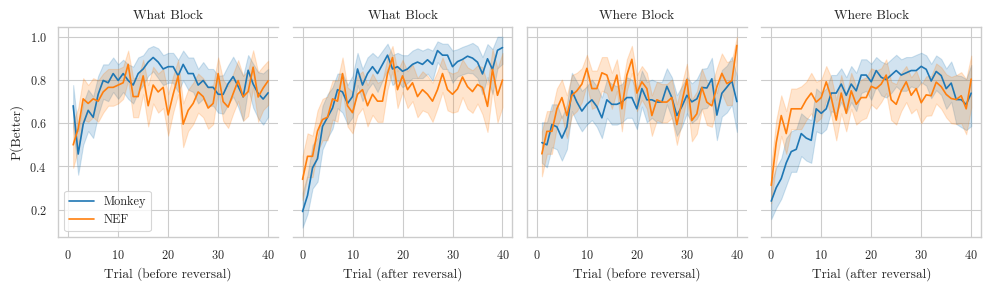

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(monkey_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[0], label='Monkey')
sns.lineplot(monkey_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[1])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[2])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[3])
sns.lineplot(model_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[0], label='NEF')
sns.lineplot(model_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[1])
sns.lineplot(model_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[2])
sns.lineplot(model_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block')
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()
fig.savefig("plots/model1_behavior.jpg", dpi=600)